In [1]:
from fastai.text import *

In [2]:
def plot_losses(nb_batches,losses,val_losses):
    last = ifnone(None,len(nb_batches))

    _, ax = plt.subplots(1,1)
    l_b = np.sum(nb_batches[-last:])
    iterations = range_of(losses)[-l_b:]
    ax.plot(iterations, losses[-l_b:], label='Train')
    val_iter = nb_batches[-last:]
    val_iter = np.cumsum(val_iter)+np.sum(nb_batches[:-last])
    ax.plot(val_iter, val_losses[-last:], label='Validation')
    ax.set_ylabel('Loss')
    ax.set_xlabel('Batches processed')
    ax.legend()

In [3]:
def plot_accuracy(nb_batches,metrics):
    "Plot metrics collected during training."
    
    _, axes = plt.subplots(1,1,figsize=(6, 4*1))
    val_iter = nb_batches
    val_iter = np.cumsum(val_iter)
    #axes = axes.flatten() if len(learn.metrics) != 1 else [axes]
    axes = [axes]
    for i, ax in enumerate(axes):
        values = [met[i] for met in metrics]
        values[0] = 0
        ax.plot(val_iter, values)
        ax.set_ylabel('Accuracy')
        ax.set_xlabel('Batches processed')
        
        ax.set_ylim([0.0,1.0])
       

In [40]:
s_h_a = '/nfs/research/ejguill/data/autopsy/no_preprocessing/folds/k-fold-suicide-homicide-accident/runs/'
s_h = '/nfs/research/ejguill/data/autopsy/no_preprocessing/folds/k-fold-suicide-homicide/runs/'

In [41]:
#AWD layers=1 max_lr=0.003 drop=0.2 fold=1 not pretrained

In [48]:
def plot_run(arch,nl,max_lr,drop,fold_id,pre_trained,run_path):
    losses = np.load(run_path + f'{arch}_layers_{nl}_max_lr_{max_lr}_drop_{drop}_fold_{fold_id}_{pre_trained}_training_loss.npy')
    val_losses = np.load(run_path + f'{arch}_layers_{nl}_max_lr_{max_lr}_drop_{drop}_fold_{fold_id}_{pre_trained}_validation_loss.npy')
    
    num_batches = np.load(run_path + f'{arch}_layers_{nl}_max_lr_{max_lr}_drop_{drop}_fold_{fold_id}_{pre_trained}_num_batches.npy')
    plot_losses(num_batches,losses,val_losses)
    metrics = np.load(run_path + f'{arch}_layers_{nl}_max_lr_{max_lr}_drop_{drop}_fold_{fold_id}_{pre_trained}_validation_accuracy.npy')
    print('final accuracy:',metrics[-1])
    plot_accuracy(num_batches, metrics)
    

final accuracy: [0.917318]


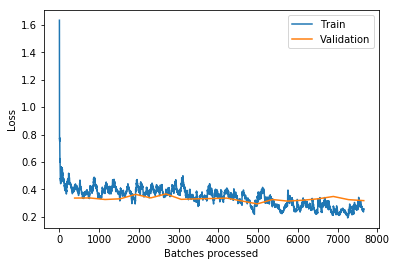

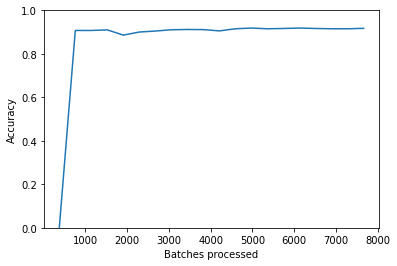

In [77]:
plot_run('awd','4','0.003','0.8','5','pre_trained',s_h_a)

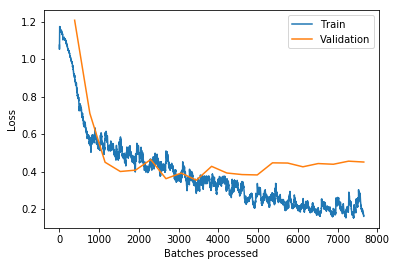

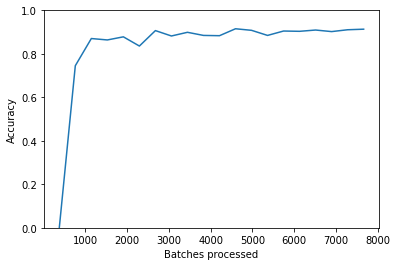

In [8]:
plot_run('qrnn','3','0.003','0.8','5','not_pre_trained')

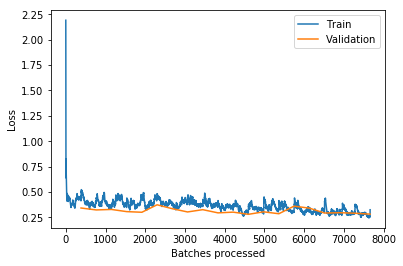

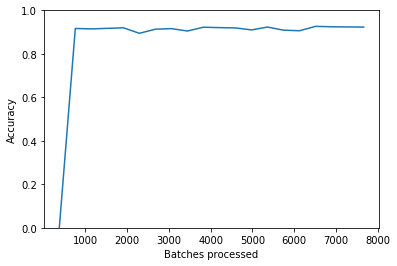

In [9]:
plot_run('awd','3','0.003','0.8','2','pre_trained')

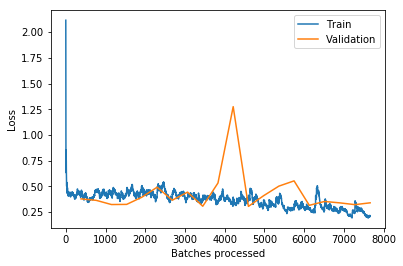

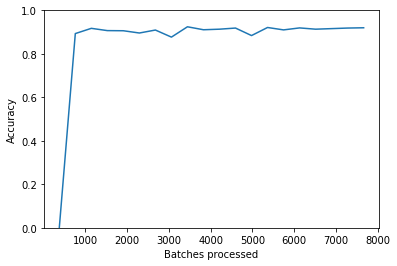

In [33]:
plot_run('awd','1','0.01','0.2','3','pre_trained')

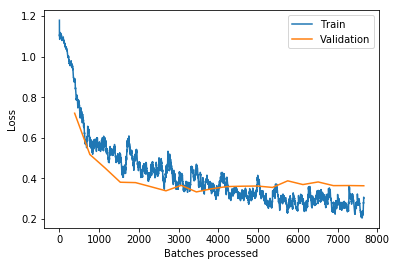

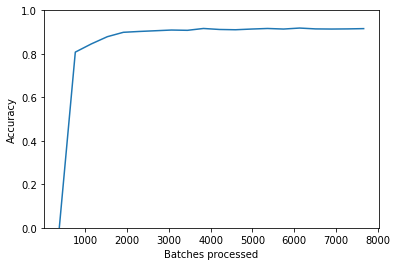

In [34]:
plot_run('qrnn','1','0.003','0.5','1','not_pre_trained')

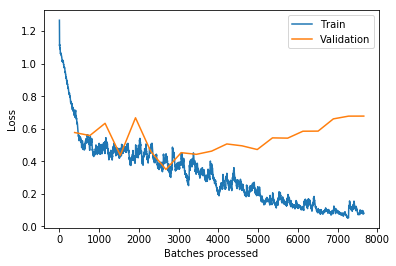

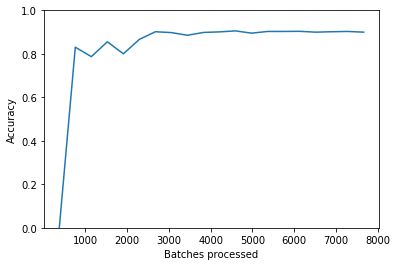

In [141]:
plot_run('awd','2','0.003','0.2','1','not_pre_trained')

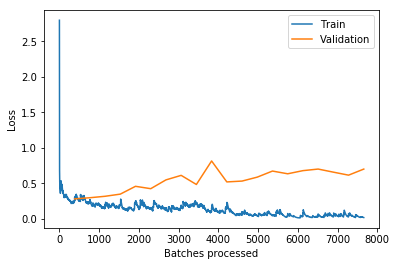

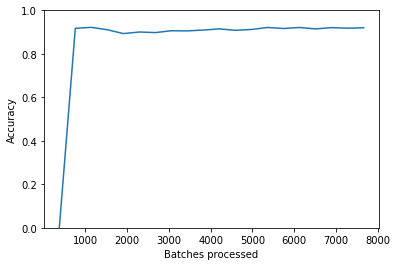

In [35]:
plot_run('awd','4','0.003','0.2','2','pre_trained')

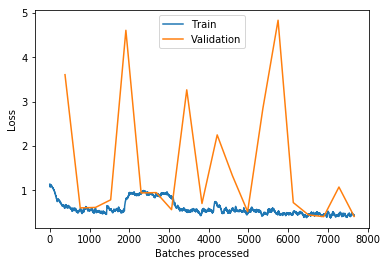

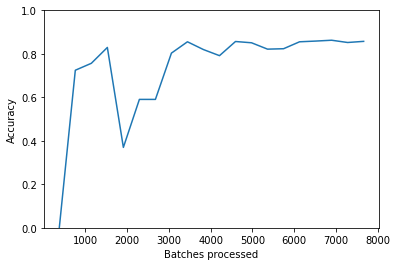

In [36]:
plot_run('awd','4','0.003','0.2','1','not_pre_trained')